In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.metrics import Accuracy
from tensorflow import convert_to_tensor
from algorithms import algos
from DataPrep import DataPrep

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
def show_loss(history):
    plt.figure()
    plt.plot(history.history['val_loss'], label="val loss")
    plt.plot(history.history['loss'],label="train loss")
    plt.title("Loss")
    plt.legend()

In [3]:
#prep data first
dp = DataPrep(f'dataset.npz')
#x, y = dp.getSamples()
x = dp.x_ns
y = dp.y_ns
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

ref_time 31.680178852183356


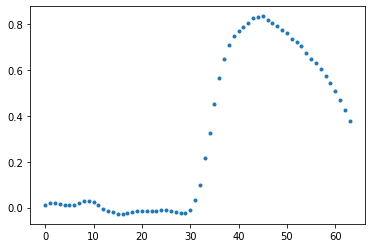

In [4]:
plt.plot(x_train[0],marker='.',linestyle='')
x_train[0][40:45]
print('ref_time',y_train[0])

In [5]:
x_train.shape

(15656, 64)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 16,641
Trainable params: 16,641
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
441/441 [==============================] - 2s 3ms/step - loss: 11.6711 - mean_absolute_error: 11.6710 - val_loss: 2.0299 - val_mean_absolute_error: 2.0302
Epoch 2/5
441/441 [==============================] - 1s 3ms/step - loss: 1.8556 - mean_abs

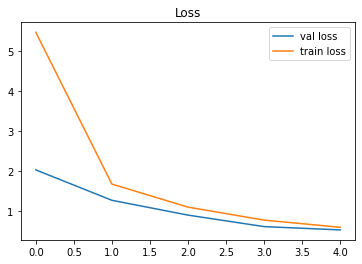

In [6]:
inputs = Input(shape=(64,))
nn = Dense(128,activation='relu')(inputs)
nn = Dense(64,activation='relu')(nn)
outputs = Dense(1)(nn)

opt = Adam()
loss = MeanAbsoluteError()

model = Model(inputs,outputs)
model.summary()
model.compile(optimizer=opt,loss=loss,metrics=[MeanAbsoluteError()])
history = model.fit(x_train,y_train,validation_split=0.1,epochs=5)
show_loss(history)

In [7]:
MAE = MeanAbsoluteError()
acc = Accuracy()
#images_test_conv = np.reshape(images_test,(len(images_test),28,28,1))
y_pred = model.predict(x_test)
loss = MAE(
	convert_to_tensor(y_test),
	convert_to_tensor(y_pred)).numpy()
accValue = MAE(y_test,y_pred).numpy()

print("Test Loss:",loss,"Test Accuracy:",accValue)


Test Loss: 0.5453682 Test Accuracy: 0.82143515


In [8]:
##compare DNN performance to CFD
##quantify DNN performance: histogram of MAE?
##compare network results with *scaled* (to ns) samples (save weights and run network on scaled samples)



